In [3]:
import mysql.connector
import pandas as pd 
import json
import numpy as np
import MySQLdb
import MySQLdb.cursors
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
db_thread = MySQLdb.connect("127.0.0.1", "root", "andhika", "usek_monev", cursorclass=MySQLdb.cursors.DictCursor)

soal = pd.read_sql("SELECT s.kunci_jawaban, s.jawaban_a, s.jawaban_b, s.jawaban_c, s.jawaban_d, s.jawaban_e, s.jumlah_benar_siswa, s.jumlah_siswa, sa.* FROM soal s join soal_analisis sa on s.id = sa.id where s.tipe_soal = 'pilihan_ganda' and sa.paket_id in (select id from paket where status = 5)", con=db_thread)
soal = soal.set_index('id') 
soal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4135 entries, 1b4f4cf1-5783-11ea-b304-86cbb67d2138 to 2cacde82-5783-11ea-b304-86cbb67d2138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kunci_jawaban       4135 non-null   object 
 1   jawaban_a           4135 non-null   int64  
 2   jawaban_b           4135 non-null   int64  
 3   jawaban_c           4135 non-null   int64  
 4   jawaban_d           4135 non-null   int64  
 5   jawaban_e           4135 non-null   int64  
 6   jumlah_benar_siswa  4135 non-null   int64  
 7   jumlah_siswa        4135 non-null   int64  
 8   salah_atas          4135 non-null   int64  
 9   salah_bawah         4135 non-null   int64  
 10  tingkat_kesulitan   4135 non-null   float64
 11  tingkat_kesukaran   4135 non-null   float64
 12  daya_pembeda        4135 non-null   float64
 13  paket_id            4135 non-null   object 
 14  cluster_testing     4135 non-null   int64 

In [5]:
soal.head()

,kunci_jawaban,jawaban_a,jawaban_b,jawaban_c,jawaban_d,jawaban_e,jumlah_benar_siswa,jumlah_siswa,salah_atas,salah_bawah,tingkat_kesulitan,tingkat_kesukaran,daya_pembeda,paket_id,cluster_testing
id,,,,,,,,,,,,,,,
1b4f4cf1-5783-11ea-b304-86cbb67d2138,a,547,64,478,359,59,547,1517,174,342,0.630807,0.360580,0.410758,1b4f4cf0-5783-11ea-b304-86cbb67d2138,2
1b4f4cf2-5783-11ea-b304-86cbb67d2138,c,208,476,572,117,132,572,1517,208,319,0.644254,0.377060,0.271394,1b4f4cf0-5783-11ea-b304-86cbb67d2138,2
1b4f4cff-5783-11ea-b304-86cbb67d2138,a,402,160,664,184,94,402,1517,248,340,0.718826,0.264997,0.224939,1b4f4cf0-5783-11ea-b304-86cbb67d2138,0
1b4f4d04-5783-11ea-b304-86cbb67d2138,e,167,425,335,118,463,463,1517,226,341,0.693154,0.305208,0.281174,1b4f4cf0-5783-11ea-b304-86cbb67d2138,0
1b4f4d06-5783-11ea-b304-86cbb67d2138,c,179,62,865,119,281,865,1517,50,314,0.444988,0.570204,0.645477,1b4f4cf0-5783-11ea-b304-86cbb67d2138,2


In [6]:
soal['jawaban_a'] = soal['jawaban_a']/soal['jumlah_siswa']
soal['jawaban_b'] = soal['jawaban_b']/soal['jumlah_siswa']
soal['jawaban_c'] = soal['jawaban_c']/soal['jumlah_siswa']
soal['jawaban_d'] = soal['jawaban_d']/soal['jumlah_siswa']
soal['jawaban_e'] = soal['jawaban_e']/soal['jumlah_siswa']

In [7]:
soal = soal.drop(['kunci_jawaban', 'tingkat_kesulitan', 'salah_atas', 'salah_bawah', 'jumlah_benar_siswa', 'jumlah_siswa', 'paket_id', 'cluster_testing'], 1)

In [8]:

soal.head()

,jawaban_a,jawaban_b,jawaban_c,jawaban_d,jawaban_e,tingkat_kesukaran,daya_pembeda
id,,,,,,,
1b4f4cf1-5783-11ea-b304-86cbb67d2138,0.360580,0.042189,0.315096,0.236651,0.038893,0.360580,0.410758
1b4f4cf2-5783-11ea-b304-86cbb67d2138,0.137113,0.313777,0.377060,0.077126,0.087014,0.377060,0.271394
1b4f4cff-5783-11ea-b304-86cbb67d2138,0.264997,0.105471,0.437706,0.121292,0.061964,0.264997,0.224939
1b4f4d04-5783-11ea-b304-86cbb67d2138,0.110086,0.280158,0.220831,0.077785,0.305208,0.305208,0.281174
1b4f4d06-5783-11ea-b304-86cbb67d2138,0.117996,0.040870,0.570204,0.078444,0.185234,0.570204,0.645477


In [9]:
soal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4135 entries, 1b4f4cf1-5783-11ea-b304-86cbb67d2138 to 2cacde82-5783-11ea-b304-86cbb67d2138
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jawaban_a          4135 non-null   float64
 1   jawaban_b          4135 non-null   float64
 2   jawaban_c          4135 non-null   float64
 3   jawaban_d          4135 non-null   float64
 4   jawaban_e          4135 non-null   float64
 5   tingkat_kesukaran  4135 non-null   float64
 6   daya_pembeda       4135 non-null   float64
dtypes: float64(7)
memory usage: 258.4+ KB


In [10]:
i=3
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(soal)
centroids = kmeans.cluster_centers_

In [11]:
y_hat = kmeans.predict(soal)

In [12]:
print(y_hat)

[2 2 0 ... 2 2 2]


In [13]:
from sklearn import metrics
labels = kmeans.labels_
metrics.silhouette_score(soal, labels, metric = 'euclidean')

0.3023779638272432

In [14]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model = kmeans.fit(soal)
    sum_of_squared_distances.append(kmeans.inertia_)

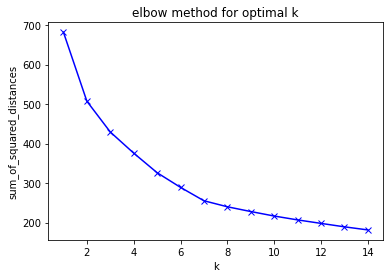

In [15]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [16]:
soal['cluster'] = y_hat

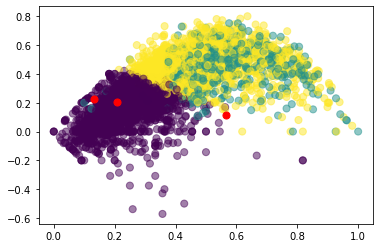

In [17]:
plt.scatter(soal['tingkat_kesukaran'], soal['daya_pembeda'], c= labels, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [18]:
soal.to_csv('kmeans_soal.csv')

In [19]:
hasil = pd.read_csv('kmeans_soal.csv')
hasil.head()

,id,jawaban_a,jawaban_b,jawaban_c,jawaban_d,jawaban_e,tingkat_kesukaran,daya_pembeda,cluster
0,1b4f4cf1-5783-11ea-b304-86cbb67d2138,0.360580,0.042189,0.315096,0.236651,0.038893,0.360580,0.410758,2
1,1b4f4cf2-5783-11ea-b304-86cbb67d2138,0.137113,0.313777,0.377060,0.077126,0.087014,0.377060,0.271394,2
2,1b4f4cff-5783-11ea-b304-86cbb67d2138,0.264997,0.105471,0.437706,0.121292,0.061964,0.264997,0.224939,0
3,1b4f4d04-5783-11ea-b304-86cbb67d2138,0.110086,0.280158,0.220831,0.077785,0.305208,0.305208,0.281174,0
4,1b4f4d06-5783-11ea-b304-86cbb67d2138,0.117996,0.040870,0.570204,0.078444,0.185234,0.570204,0.645477,2


In [133]:
cur_thread = db_thread.cursor()
print(cur_thread)

In [134]:
testing = soal.iterrows()
for index, soal in testing:
    sql = "update soal_analisis set cluster_testing=%d where id='%s'" % (soal['cluster'], index)
    print(sql)
    cur_thread.execute(sql)
db_thread.commit()

update soal_analisis set cluster_testing=2 where id='1b4f4cf1-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4cf2-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4cff-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4d04-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4d06-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4d0b-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4d10-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4d18-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1b4f4d1e-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4d23-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4d28-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=2 where id='1b4f4dec-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1b4f4df1-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4df6-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4e05-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4e06-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1b4f4e07-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4e08-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1b4f4e09-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4e0a-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4e17-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4e20-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=1 where id='1b4f4f17-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4f1c-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4f20-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1b4f4f22-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4f28-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4f2b-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1b4f4f31-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4f39-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1b4f4f3a-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1b4f4f44-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1b4f4f46-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=2 where id='1d2d472f-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1d2d4730-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1d2d474e-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1d2d4753-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1d2d4758-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1d2d475d-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1d2d4762-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1d2d4767-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1d2d476c-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1d2d4771-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1d2d4699-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=0 where id='1e6a40f9-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='1e6a4103-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1e6a4108-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1e6a410d-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1e6a4112-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1e6a4117-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1e6a411c-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='1e6a4126-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1e6a412b-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1e6a4130-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='1e6a4135-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=2 where id='20c08f97-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='20c08f9c-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08fa6-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fab-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08fb0-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fb5-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08fba-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08edc-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08eea-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='20c08eef-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08ef4-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=0 where id='21fb689c-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='21fb68a1-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fc4-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fcb-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08fd1-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fd6-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fd9-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fde-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='20c08fe3-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08fe8-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='20c08fed-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=2 where id='24542ac6-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='24542ac7-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='24542acd-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='24542ad8-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='24542add-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='24542ae7-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='24542af2-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='24542af4-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='24542af9-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='24542a1e-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='24542a26-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=1 where id='2584f1c8-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='2584f1cd-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='2584f1d2-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='2584f1d7-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='2584f1d9-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='2584f1e1-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='2584f1e7-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='2584f1ea-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='2584f1f0-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='2584f1f5-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='2584f1ff-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=0 where id='26b8cb3d-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='26b8cb42-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cb43-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cb48-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='26b8cb4d-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='26b8cb52-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cb5c-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cb61-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cb6a-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='26b8cb6f-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cb74-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=0 where id='26b8cbf8-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='26b8cbf9-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cbfa-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cbfb-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='26b8cbfc-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cbfd-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cbfe-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cc00-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cc25-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cc26-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='26b8cc2b-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=0 where id='29187f20-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187f26-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187f2b-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='29187f30-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='29187f3b-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='29187f40-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='29187f45-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='29187f4a-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='29187f4f-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='29187f54-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='29187f59-5783-11ea-b304-86cbb67d2138'

update soal_analisis set cluster_testing=2 where id='29187f8a-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=2 where id='29187f8f-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='29187f94-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187f99-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='29187f9e-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187fa3-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187fa8-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187fad-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187fb2-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=1 where id='29187fb7-5783-11ea-b304-86cbb67d2138'
update soal_analisis set cluster_testing=0 where id='29187fbc-5783-11ea-b304-86cbb67d2138'